# Análise e Predição da Qualidade de Vinhos com Machine Learning

## Introdução

O dataset Wine Quality, utilizado para análise e treinamento do algoritmo, encontra-se no repositório [UCI machine learning](https://archive.ics.uci.edu/dataset/186/wine+quality). O dataset é originalmente proveniente do trabalho do [Dr. Paulo Cortez](https://pcortez.dsi.uminho.pt/) e também está disponível na plataforma [Kaggle](https://www.kaggle.com/).

O dataset é composto por 1599 observações de vinhos tintos e 4898 observações de vinhos brancos. Para cada um, está atribuída uma classificação (Qualidade) e onze atributos químicos, que são os seguintes:

- Acidez Fixa: Refere-se aos ácidos estáveis e não voláteis, sendo os principais o ácido tartárico, que contribui para a `acidez` e `frescura` do vinho, e o ácido málico, que confere um `sabor nítido` e `ácido`.
- Acidez Volátil: Geralmente associada ao ácido acético, em pequenas quantidades pode adicionar `complexidade aos aromas`, mas em excesso pode resultar em um sabor desagradável de vinagre.
- Ácido Cítrico: Contribui para a `complexidade` e `frescura` do vinho, mas em excesso pode torná-lo excessivamente ácido.
- Açúcar Residual: Refere-se ao açúcar remanescente da fermentação.
- Cloretos: O sal presente no vinho, que pode entrar na bebida a partir de várias fontes, como o solo em que as uvas foram produzidas ou a água de irrigação.
- Dióxido de Enxofre Livre: É um `agente conservante` adicionado para proteger o vinho contra a oxidação, preservar a qualidade e prolongar a vida útil.
- Dióxido de Enxofre Total: Refere-se à quantidade total de dióxido de enxofre presente no vinho.
- Densidade: Está relacionada à densidade da água e é diretamente influenciada pela `porcentagem de álcool` e `açúcar` no vinho.
- pH: Refere-se ao `nível de pH` do vinho em uma escala de 0 a 14.
- Sulfatos: É um `aditivo` que pode contribuir para os níveis de dióxido de enxofre no vinho.
- Álcool: Refere-se ao `teor alcoólico` do vinho.

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


## Dataset

In [2]:
wines_red = 'winequality-red.csv'
wines_white = 'winequality-white.csv'

df_red = pd.read_csv(wines_red, sep=';')
df_white = pd.read_csv(wines_white, sep=';')

df = pd.concat([df_red.assign(red=1), df_white.assign(red=0)])

In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
# Renomeando as colunas para facilitar a análise
new_names = {'fixed acidity': 'Acidez fixa',
             'volatile acidity': 'Acidez volátil',
             'citric acid': 'Ácido cítrico',
             'residual sugar': 'Açúcar residual',
             'chlorides': 'Cloretos',
             'free sulfur dioxide': 'Dióxido de enxofre livre',
             'total sulfur dioxide': 'Dióxido de enxofre total',
             'density': 'Densidade',
             'pH': 'pH',
             'sulphates': 'Sulfatos',
             'alcohol': 'Álcool',
             'quality': 'Qualidade'}

df = df.rename(columns=new_names)

In [5]:
df.head(5)

,Acidez fixa,Acidez volátil,Ácido cítrico,Açúcar residual,Cloretos,Dióxido de enxofre livre,Dióxido de enxofre total,Densidade,pH,Sulfatos,Álcool,Qualidade,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


## Prevendo a cor de um vinho

In [6]:
X = df.drop(columns=['Qualidade', 'red'])
y = df.red

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
svm_color = SVC(kernel='linear', random_state=1, C=1)
svm_color.fit(X_train, y_train)
svm_color.score(X_test, y_test)

0.9869230769230769

#### Principais fatores que influenciam a coloração do vinho

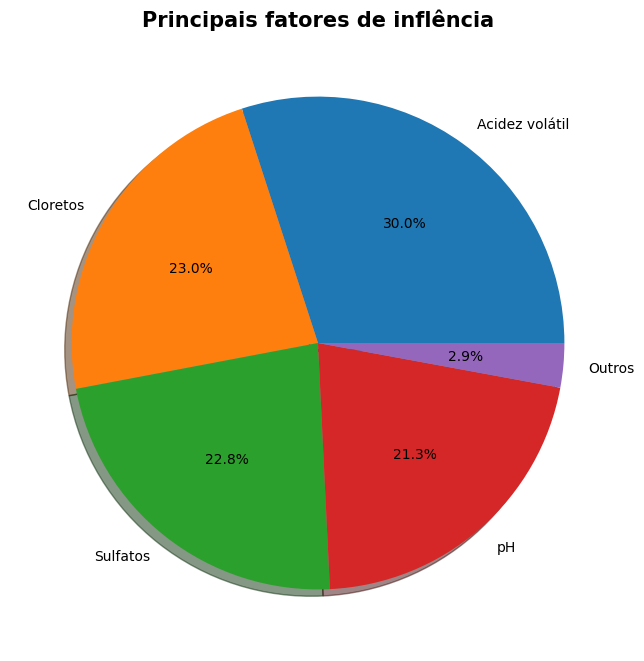

In [8]:
graph = pd.DataFrame({
    'Atributo': X_train.columns,
    'Peso': svm_color.coef_[0]
}).sort_values(by='Peso', ascending=False)

top_3 = graph.head(4)
other = graph.tail(7).sum()
other_sum = other['Peso']

new_graph = pd.concat([top_3, pd.DataFrame({'Atributo': ['Outros'], 'Peso': [other_sum]})])

plt.figure(figsize=(8, 8))
plt.pie(new_graph['Peso'], labels=new_graph['Atributo'], shadow=True, autopct='%1.1f%%')

plt.title('Principais fatores de influência', fontweight='bold', fontsize=15)

plt.show()

## Prevendo a Qualidade de um vinho

A previsão será realizada por meio da média dos resultados dos algoritmos de aprendizado de máquina mais promissores. Dentre os métodos a serem testados, destacam-se:

- `Random Forest` - RandomForestClassifier()
- `kNN` - KNeighborsClassifier()
- `Redes Neurais Artificiais` - MLPClassifier()

Esses algoritmos serão avaliados e selecionados para a construção do resultado final.

## Dataset

In [9]:
wines_red = 'winequality-red.csv'
wines_white = 'winequality-white.csv'

df_red = pd.read_csv(wines_red, sep=';')
df_white = pd.read_csv(wines_white, sep=';')

df = pd.concat([df_red, df_white])

# Renomeando as colunas para facilitar a análise
new_names = {'fixed acidity': 'Acidez fixa',
             'volatile acidity': 'Acidez volátil',
             'citric acid': 'Ácido cítrico',
             'residual sugar': 'Açúcar residual',
             'chlorides': 'Cloretos',
             'free sulfur dioxide': 'Dióxido de enxofre livre',
             'total sulfur dioxide': 'Dióxido de enxofre total',
             'density': 'Densidade',
             'pH': 'pH',
             'sulphates': 'Sulfatos',
             'alcohol': 'Álcool',
             'quality': 'Qualidade'}

df = df.rename(columns=new_names)

In [10]:
X = df.drop(columns=['Qualidade'])
y = df.Qualidade

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

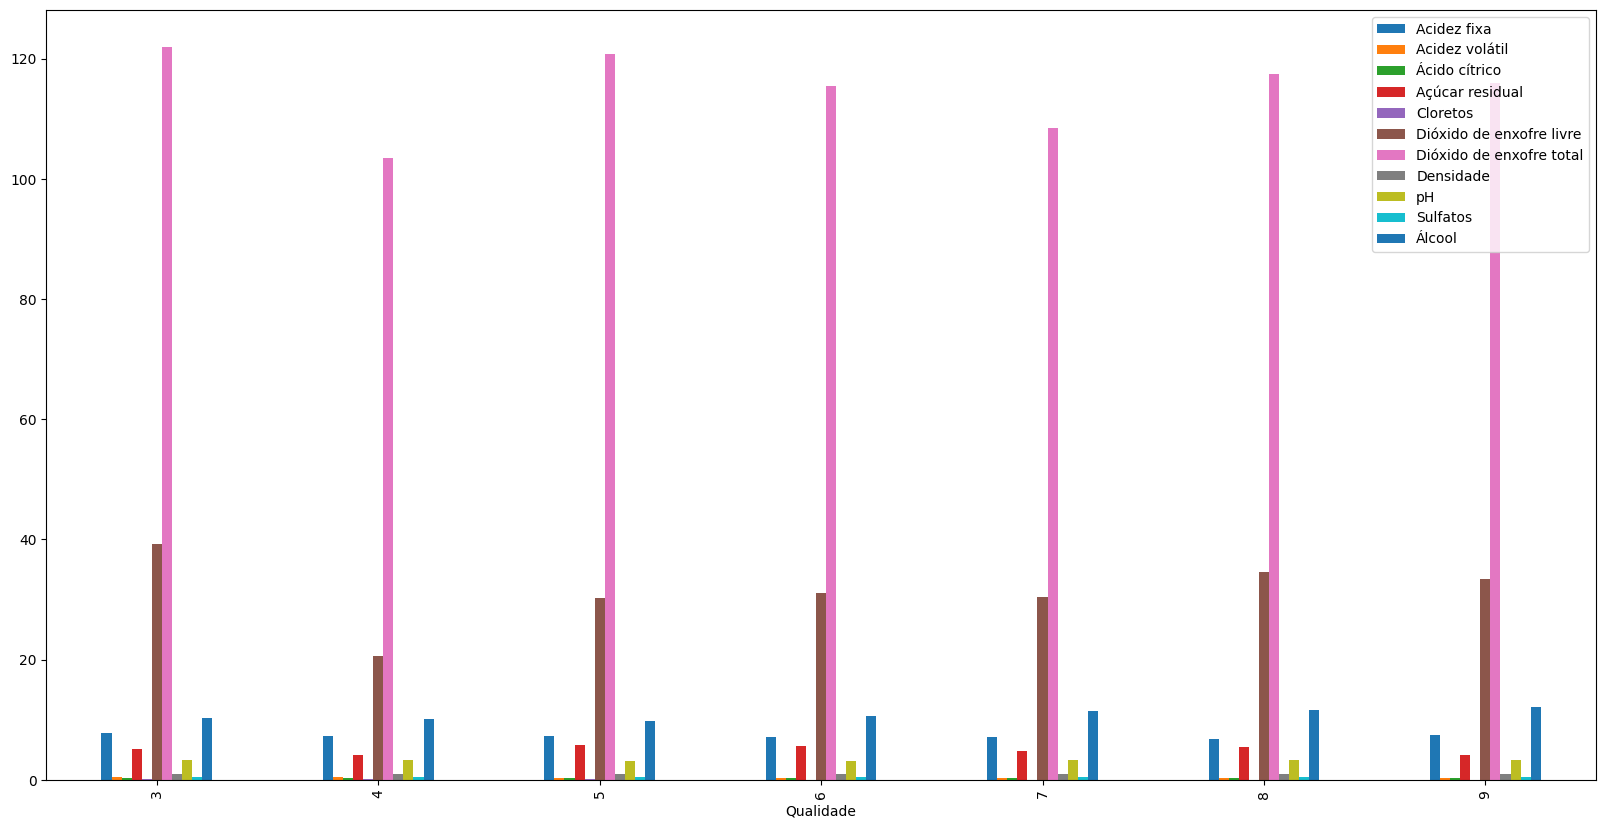

In [11]:
graph_all = df.groupby("Qualidade").mean()
graph_all.plot(kind = "bar", figsize=(20, 10));

### Influência de alguns atributos

#### Álcool

Vinhos de maior qualidade tendem a ter um teor alcoólico mais elevado.

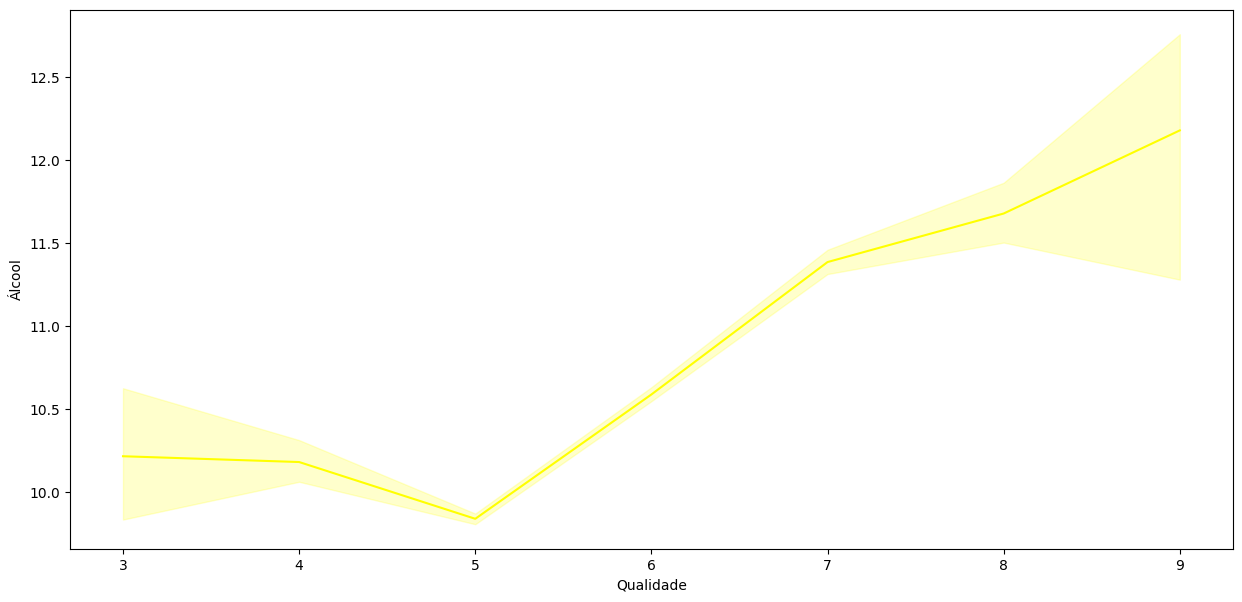

In [12]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="Qualidade",y="Álcool", color="yellow");

#### Acidez volátil
Vinhos de qualidade inferior geralmente apresentam níveis mais elevados de acidez volátil. A presença moderada desse atributo pode adicionar complexidade aos aromas, mas quando em excesso, pode resultar em um sabor desagradável de vinagre.

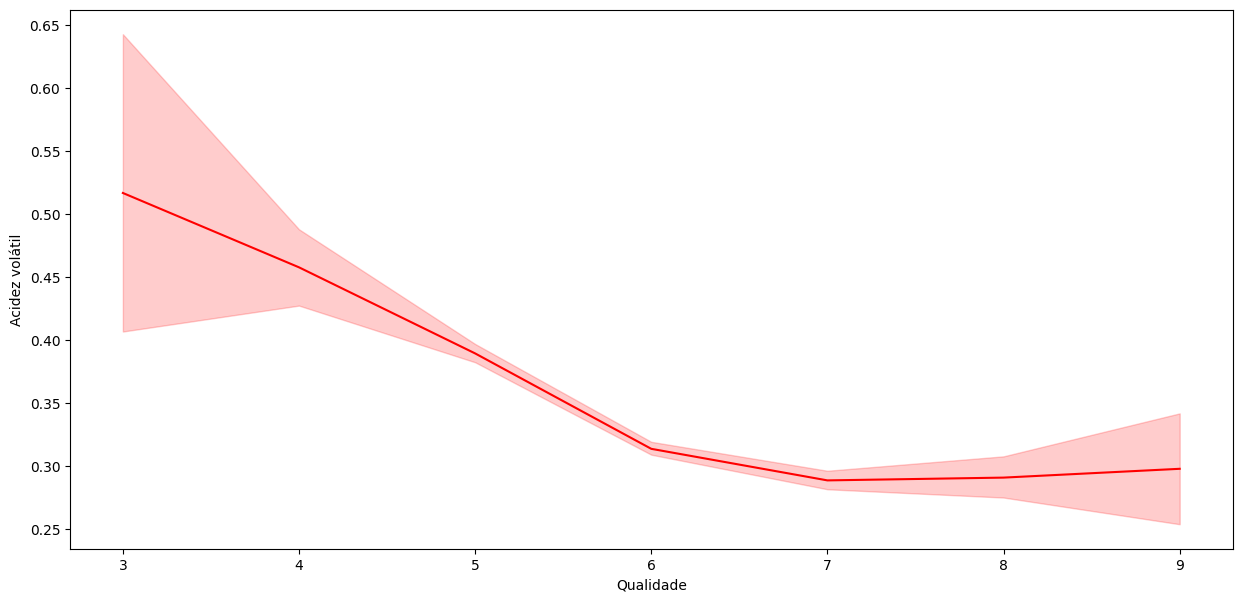

In [13]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="Qualidade",y="Acidez volátil",color="red");

#### Densidade
Vinhos de alta qualidade geralmente apresentam uma densidade mais baixa, devido ao teor alcoólico mais elevado e à menor quantidade de açúcar residual.

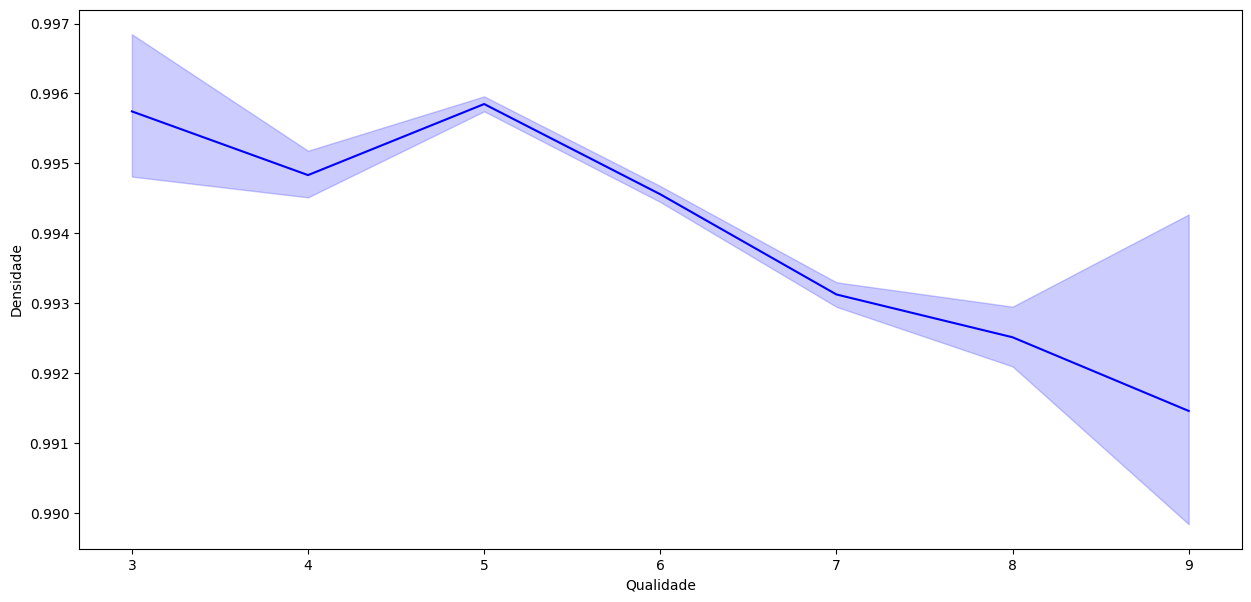

In [14]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="Qualidade",y="Densidade",color="blue");

### Testando os algorítmos

In [15]:
models = {
            "ANN": MLPClassifier(max_iter=200, verbose=False, tol=0.00001, hidden_layer_sizes=(55, 55)),
            "RandomForest": RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=1),
            "kNN": KNeighborsClassifier(n_neighbors=5),
        }


In [16]:
columns = ['Modelo', 'Precisão', 'Previsão', 'Objetivo']
rows = []

result = pd.DataFrame(columns=columns)

for name, model in models.items():

    train = model.fit(X_train, y_train)
    score = train.score(X_test, y_test)
    predictions = model.predict(X_test)

    for i in range(len(X_test)):
        target = y_test.iloc[i]
        predict = predictions[i]

        row = pd.Series({'Modelo': name, 'Precisão': score, 'Previsão': predict, 'Objetivo': target})
        rows.append(row)

result = pd.DataFrame(rows, columns=columns)
    

In [17]:
result.groupby('Modelo').head(10)

,Modelo,Precisão,Previsão,Objetivo
0,ANN,0.526923,5,5
1,ANN,0.526923,6,5
2,ANN,0.526923,5,6
3,ANN,0.526923,5,5
4,ANN,0.526923,5,6
5,ANN,0.526923,7,7
6,ANN,0.526923,5,6
7,ANN,0.526923,6,6
8,ANN,0.526923,6,6
9,ANN,0.526923,6,5


## Conclusão

Concluímos que, entre os três algoritmos avaliados, o Random Forest é o mais eficaz na previsão da qualidade do vinho, com uma precisão de 67%. Por outro lado, o kNN demonstrou ser o menos eficaz, com uma precisão inferior a 50%.

In [18]:
mean_precisions = result.groupby('Modelo')['Precisão'].mean().reset_index()

fig = px.bar(mean_precisions, x='Modelo', y='Precisão', title='Comparação da Precisão dos Modelos')
fig.update_xaxes(title_text='Modelo')
fig.update_yaxes(title_text='Precisão Média')

fig.update_layout(width=800, height=600)

fig.show()